In [15]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2022)    # Set seed for reproducibility

class XOR_Net:
    # Training data
    XOR_INPUTS = np.array([
        [0, 0],
        [1, 0],
        [0, 1],
        [1, 1]
    ])

    # Labels for training data
    XOR_OUTPUTS = np.array([
        [0],
        [1],
        [1],
        [0]
    ])

    NUM_EXAMPLES = XOR_INPUTS.shape[0]
    NUM_INPUT_NEURONS = XOR_INPUTS.shape[1]       # 2
    NUM_HIDDEN_NEURONS = 2
    NUM_OUTPUT_NEURONS = XOR_OUTPUTS.shape[1]     # 1

    def __init__(self):
        """
        Initialize the network. Weights and biases are initialized randomly using Gaussian distribution (mean=0, variance=1)
        """
        # Build a list containing the number of neurons in each layer
        self.layers = [self.NUM_INPUT_NEURONS, self.NUM_HIDDEN_NEURONS, self.NUM_OUTPUT_NEURONS]
        self.num_layers = len(self.layers)
        
        # Initialize lists of zero ndarrays to hold the bias vectors and weight matrices for each layer
        # (set no biases for the first (input) layer)
        self.biases = [np.zeros((y, 1)) for y in self.layers[1:]]
        self.weights = [np.random.randn(y, x) for x, y in zip(self.layers[:-1], self.layers[1:])]
    
    def __str__(self):
        network = ""
        layers = str(self.layers)
        network = "Layers: " + layers
        return network
    
    def display_Parameters(self):
        """
        """
        for layer in range(len(self.weights)):
            print(f"Layer {layer}:")
            print("Weights:")
            print(self.weights)
            print("\nBiases:")
            print(self.biases)
            print()

    def feedforward(self, input):
        """
        The feedforward behavior of the network.

        Args:
            - input: a (2x1) ndarray representing the binary input to the network
        
        Returns: a (1x1) ndarray representing the activation of the output neuron
        """
        activation = input
        for bias, Weight in zip(self.biases, self.weights):
            activation = sigmoid(Weight @ activation + bias)
        return activation

    def predict(self, input):
        """
        Uses the network to predict XOR.

        Args:
            - input: a (2x1) ndarray representing the binary input to the network
        
        Returns: a (1x1) ndarray representing a guess of the XOR output
        """
        output = self.feedforward(input)
        prediction = (output.squeeze() > 0.5) * 1   # guess '1' if output neuron is above 0.5 activation
        return prediction
    
    def train(self, epochs, learn_rate):
        """
        Train the network using gradient descent, and plot the cost vs. epochs.

        Args:
            - epochs: an integer, which is the number of training cycles
            - learn_rate: a float, which is the step size for gradient descent
        """
        costs = []
        for _ in range(epochs):
            del_b = [np.zeros(bias.shape) for bias in self.biases]
            del_W = [np.zeros(Weight.shape) for Weight in self.weights]
            training_costs = []

            # Train on all XOR outputs
            for input, output in zip(self.XOR_INPUTS, self.XOR_OUTPUTS):
                input = input.reshape(2, 1)
                delta_del_b, delta_del_W = self.backprop(input, output)
                del_b = [db + ddb for db, ddb in zip(del_b, delta_del_b)]   # add change in gradient from one training example
                del_W = [dW + ddW for dW, ddW in zip(del_W, delta_del_W)]   # add change in gradient from one training example
                example_cost = cross_entropy_cost(self.feedforward(input), output).squeeze()
                training_costs.append(example_cost)
            
            # Update the weights and biases
            self.weights = [W - (learn_rate / self.NUM_EXAMPLES) * nW
                            for W, nW in zip(self.weights, del_W)]
            self.biases = [b - (learn_rate / self.NUM_EXAMPLES) * nb
                            for b, nb in zip(self.biases, del_b)]
            costs.append((1 / self.NUM_EXAMPLES) * sum(training_costs))

        plt.plot(costs)
        plt.xlabel("Epochs")
        plt.ylabel("Cost")
    
    def backprop(self, input, output):
        """
        Compute gradient of the cost function.

        Args:
            - input: an (2x1) ndarray, which holds the binary inputs to the network
            - output: an ndarray containing a single binary value (0, 1), which is the expected output of XOR on the input
        
        Returns a tuple '(del_b, del_W)' representing the gradient of the cost function.
            - 'del_b' and 'del_W' are lists of numpy arrays, which are the bias vector and weight matrix for each
              layer of the network
        """
        del_b = [np.zeros(bias.shape) for bias in self.biases]
        del_W = [np.zeros(Weight.shape) for Weight in self.weights]

        # Forward pass
        activation = input
        activations = [input]   # list to store activation vectors layer by layer
        zs = [] # list to hold all z vectors, layer by layer (a = sigmoid(z))

        for bias, Weight in zip(self.biases, self.weights):
            z = Weight @ activation + bias
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        
        # Backward pass
        error = activations[-1] - output
        del_b[-1] = error   
        del_W[-1] = error @ activations[-2].transpose() 
        
        for layer in range(2, self.num_layers):
            z = zs[-layer]  # Iterate through the layers backwards
            sigprime_z = sigmoid_prime(z)
            error = (self.weights[-layer + 1].transpose() @ error) * sigprime_z
            del_b[-layer] = error
            del_W[-layer] = error @ activations[-layer - 1].transpose()
        gradient = (del_b, del_W)

        return gradient

def sigmoid(z):
    """The sigmoid function"""
    return 1.0 / (1.0 + np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function"""
    return sigmoid(z) * (1 - sigmoid(z))

def cross_entropy_cost(a, y):
        """
        The Cross-Entropy cost function.

        Args *for this network*:
            - y: a (1x1) ndarray, which is the expected XOR output
            - a: a (1x1) ndarray, which contains the activation of the output neuron for one training example
        
        Returns the cross-entropy cost for the training example
        """
        return np.sum(np.nan_to_num(-y * np.log(a) - (1 - y) * np.log(1 - a)))


In [16]:
network = XOR_Net()

# Show the parameters prior to training by gradient descent
network.display_Parameters()

Layer 0:
Weights:
[array([[-5.27899086e-04, -2.74901425e-01],
       [-1.39285562e-01,  1.98468616e+00]]), array([[0.28210933, 0.76080866]])]

Biases:
[array([[0.],
       [0.]]), array([[0.]])]

Layer 1:
Weights:
[array([[-5.27899086e-04, -2.74901425e-01],
       [-1.39285562e-01,  1.98468616e+00]]), array([[0.28210933, 0.76080866]])]

Biases:
[array([[0.],
       [0.]]), array([[0.]])]



In [17]:
# Show the network's performance prior to training by gradient descent
for input in network.XOR_INPUTS:
    show_input = input
    input = input.reshape(2,1)
    output = network.feedforward(input).squeeze()
    prediction = network.predict(input)
    print(f"For {show_input}, network output is: {output}")
    print(f"Network predicts: {prediction}")

For [0 0], network output is: 0.6274888640591264
Network predicts: 1
For [1 0], network output is: 0.6212770288530577
Network predicts: 1
For [0 1], network output is: 0.6879763341643256
Network predicts: 1
For [1 1], network output is: 0.685416056582199
Network predicts: 1


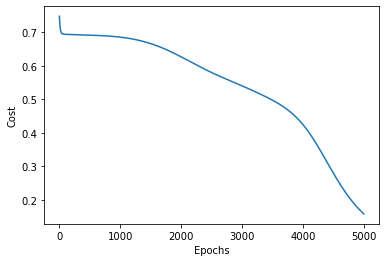

In [18]:
# Train the network and display average cost per epoch
network.train(5000, .1)

In [19]:
# Show the parameters after training by gradient descent
network.display_Parameters()

Layer 0:
Weights:
[array([[2.62490605, 2.62065491],
       [5.63753757, 5.61251607]]), array([[-5.72680091,  6.24722183]])]

Biases:
[array([[-3.85811591],
       [-1.88899609]]), array([[-3.0047804]])]

Layer 1:
Weights:
[array([[2.62490605, 2.62065491],
       [5.63753757, 5.61251607]]), array([[-5.72680091,  6.24722183]])]

Biases:
[array([[-3.85811591],
       [-1.88899609]]), array([[-3.0047804]])]



In [20]:
# Show the network's performance after training by gradient descent
for input in network.XOR_INPUTS:
    show_input = input
    input = input.reshape(2,1)
    output = network.feedforward(input).squeeze()
    prediction = network.predict(input)
    print(f"For {show_input}, network output is: {output}")
    print(f"Network predicts: {prediction}")

For [0 0], network output is: 0.09091341717765264
Network predicts: 0
For [1 0], network output is: 0.8589517240975013
Network predicts: 1
For [0 1], network output is: 0.8590355705515283
Network predicts: 1
For [1 1], network output is: 0.2074129559867437
Network predicts: 0
